In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('../data/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [93]:
df.shape

(7043, 21)

In [94]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total missing Values, number of churns(true and false)

In [96]:
print('\nTotal Missing Values')
print(df.isnull().sum())


Total Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [97]:
print('\nDataFrame Describe')
print(df.describe())


DataFrame Describe
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [98]:
print(f"\nTotal Churn of Variable: {df['Churn'].value_counts()}")


Total Churn of Variable: Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [99]:
df['TotalCharges'].describe()

# is_churn = df['Churn'] == 'Yes'
# df[is_churn]

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [100]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [101]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [102]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
customer_ids = df['customerID']


In [105]:
df = df.drop('customerID', axis=1)

In [106]:
print(df['TotalCharges'].isnull().sum())

11


In [107]:
df['TotalCharges'].describe

<bound method NDFrame.describe of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


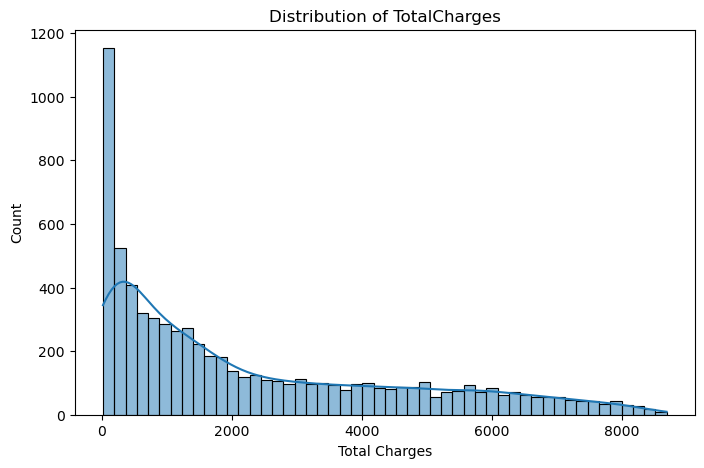

In [108]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalCharges'], bins=50, kde=True)
plt.title("Distribution of TotalCharges")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()


In [111]:
df['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [112]:
skew_value = df['TotalCharges'].skew()
print("Skewness of TotalCharges:", skew_value)



Skewness of TotalCharges: 0.961642499724251


In [113]:
print("Missing before:", df['TotalCharges'].isna().sum())

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("Missing after:", df['TotalCharges'].isna().sum())


Missing before: 11
Missing after: 0


In [114]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService',
                                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies'], drop_first=True)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   object 
 3   Dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   object 
 6   PaperlessBilling                       7043 non-null   object 
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   object 
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [116]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,...,False,True,False,False,False,False,False,False,False,False
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,...,False,False,False,True,False,False,False,False,False,False
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,...,False,True,False,False,False,False,False,False,False,False
3,Male,0,No,No,45,No,No,42.30,1840.75,No,...,False,False,False,True,False,True,False,False,False,False
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,No,...,False,False,False,True,False,True,False,True,False,True
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,No,...,False,True,False,True,False,False,False,True,False,True
7040,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No,...,False,False,False,False,False,False,False,False,False,False
7041,Male,1,Yes,No,4,Yes,Yes,74.40,306.60,Yes,...,False,False,False,False,False,False,False,False,False,False


In [117]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    print(col, df[col].unique())


gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [118]:
# Map Yes/No to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Map gender separately
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Convert bool columns (True/False) to int (1/0)
df = df.astype({col: int for col in df.select_dtypes('bool').columns})


In [119]:
print(df.dtypes)



gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electronic check             int64
PaymentMethod_Mailed check                 int64
InternetService_Fiber optic                int64
InternetService_No                         int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes  

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   int64  
 11  Cont

In [123]:
print(df['Churn'].value_counts(normalize=True)*100)


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [124]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].median()



,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,38.0,64.425,1679.525
1,10.0,79.650,703.550


In [125]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.569965,61.265124,2552.882494
1,17.979133,74.441332,1531.796094


In [126]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    print("\n", col)
    print(df.groupby(col)['Churn'].mean())



 gender
gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

 Partner
Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64

 Dependents
Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64

 PhoneService
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64

 PaperlessBilling
PaperlessBilling
0    0.163301
1    0.335651
Name: Churn, dtype: float64


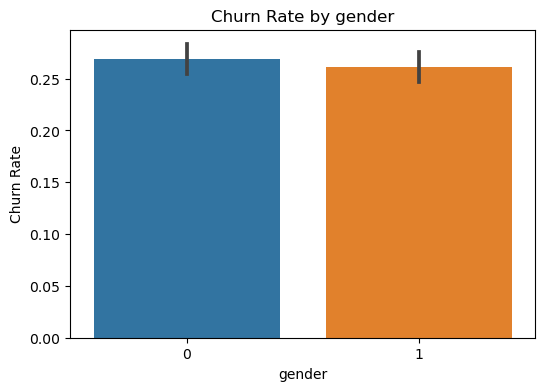

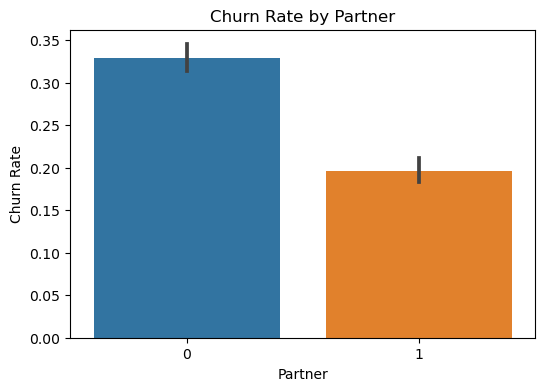

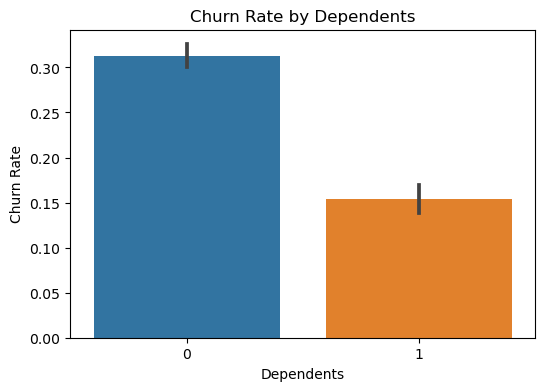

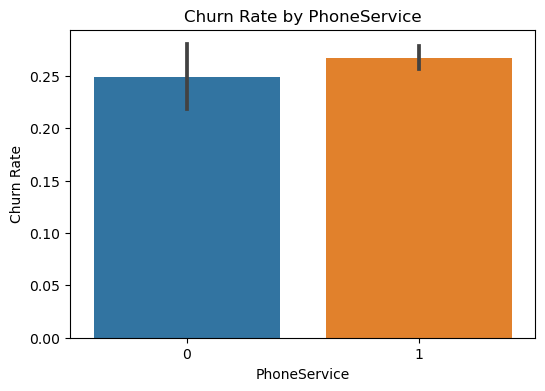

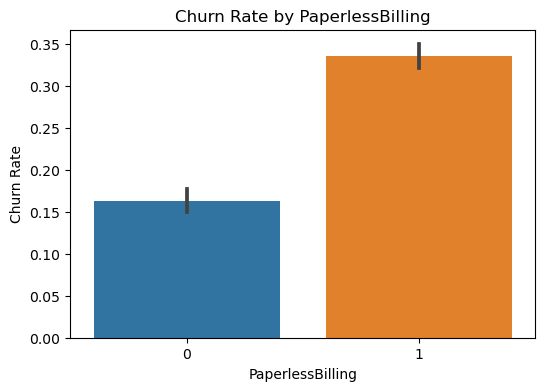

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn rate by categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


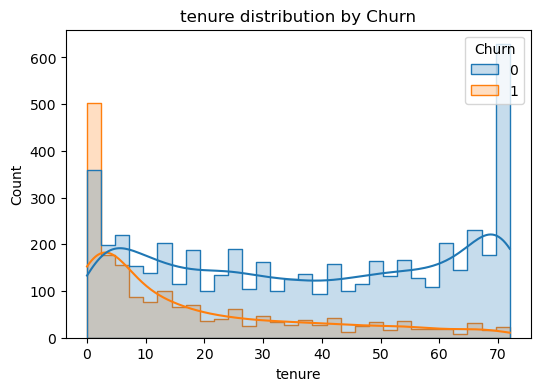

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


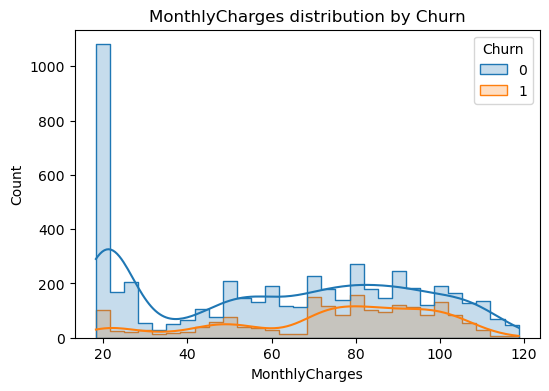

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


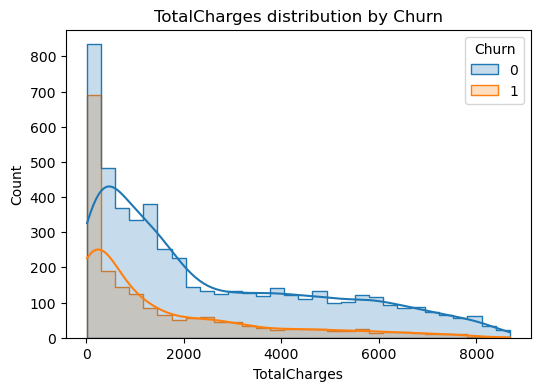

In [128]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', bins=30, kde=True, element="step")
    plt.title(f"{col} distribution by Churn")
    plt.show()


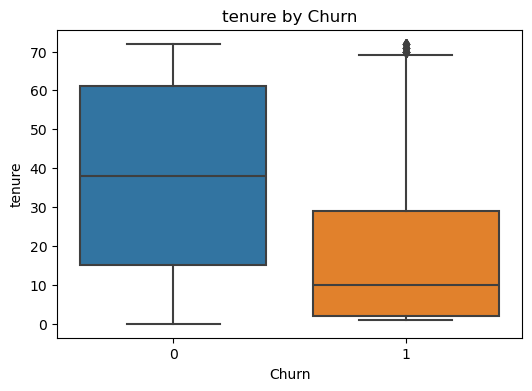

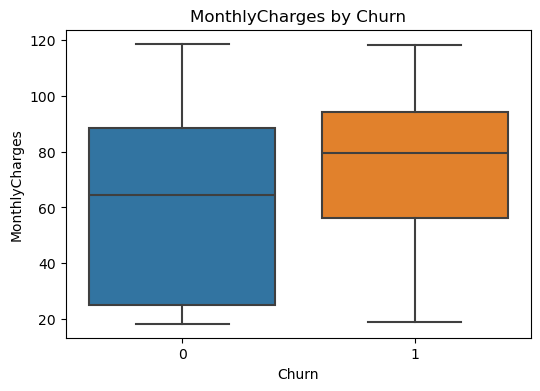

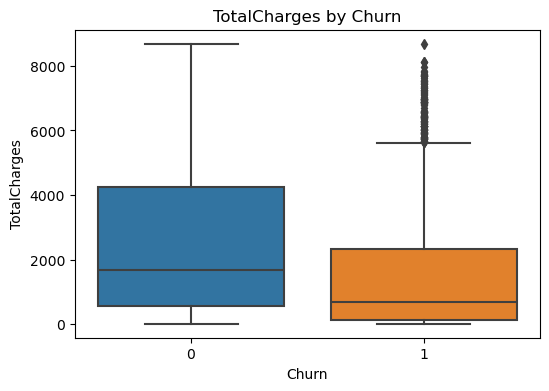

In [129]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn")
    plt.show()


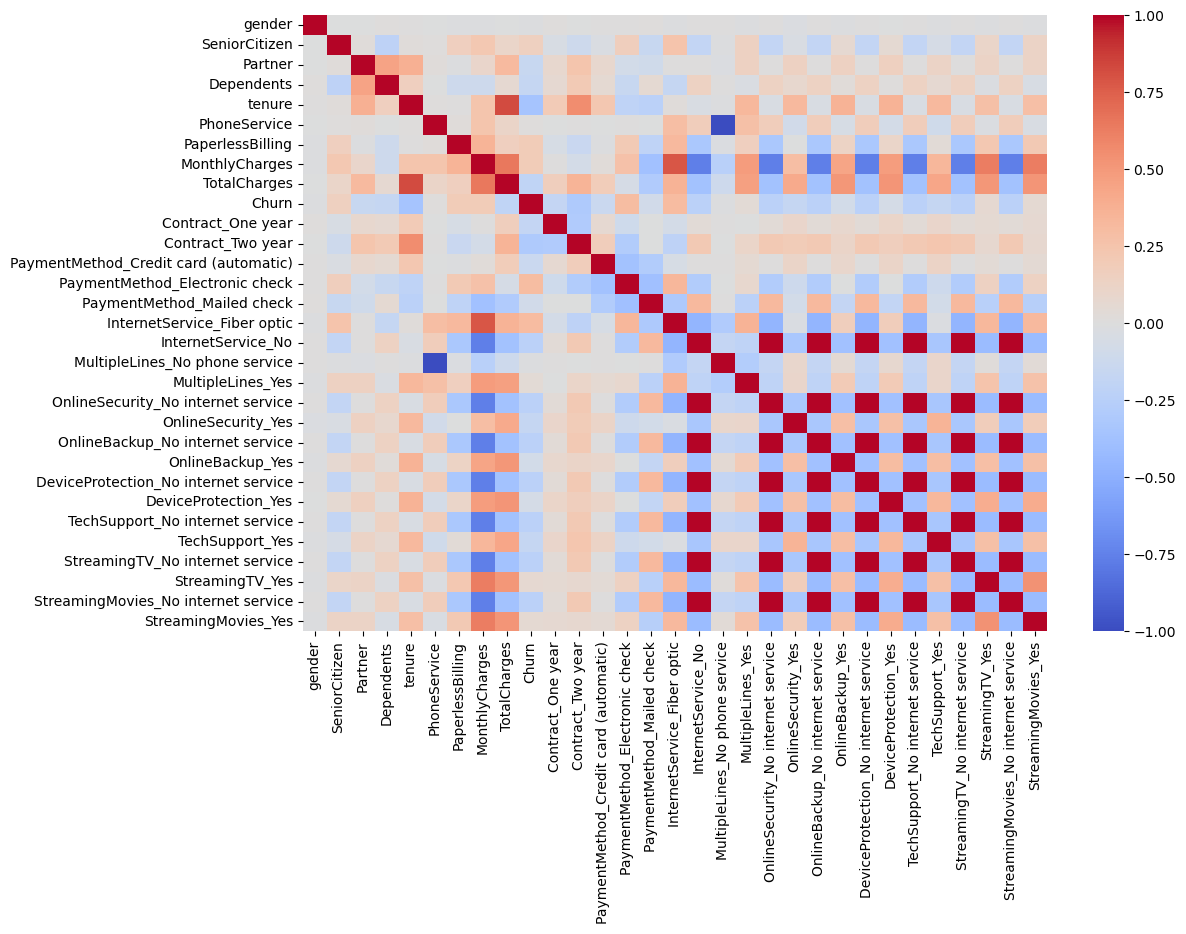

In [130]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [131]:
# Extract top churn correlations for documentation
churn_corr = df.corr()['Churn'].sort_values(key=abs, ascending=False)
print("🎯 TOP CHURN CORRELATIONS:")
print(churn_corr.head(10))

print("\n🔴 HIGHEST RISK FACTORS:")
high_risk = churn_corr[churn_corr > 0.1]
for feature, corr in high_risk.items():
    if feature != 'Churn':
        print(f"{feature}: {corr:.3f}")

print("\n🔵 PROTECTIVE FACTORS:")
protective = churn_corr[churn_corr < -0.1]
for feature, corr in protective.items():
    print(f"{feature}: {corr:.3f}")

🎯 TOP CHURN CORRELATIONS:
Churn                                   1.000000
tenure                                 -0.352229
InternetService_Fiber optic             0.308020
Contract_Two year                      -0.302253
PaymentMethod_Electronic check          0.301919
StreamingMovies_No internet service    -0.227890
InternetService_No                     -0.227890
DeviceProtection_No internet service   -0.227890
OnlineBackup_No internet service       -0.227890
OnlineSecurity_No internet service     -0.227890
Name: Churn, dtype: float64

🔴 HIGHEST RISK FACTORS:
InternetService_Fiber optic: 0.308
PaymentMethod_Electronic check: 0.302
MonthlyCharges: 0.193
PaperlessBilling: 0.192
SeniorCitizen: 0.151

🔵 PROTECTIVE FACTORS:
tenure: -0.352
Contract_Two year: -0.302
StreamingMovies_No internet service: -0.228
InternetService_No: -0.228
DeviceProtection_No internet service: -0.228
OnlineBackup_No internet service: -0.228
OnlineSecurity_No internet service: -0.228
StreamingTV_No internet ser